In [2]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 23: Hypothesis Testing, Continued

Recall in Lesson 22, we covered hypothesis testing. The structure of a hypothesis test is largely similar regardless of the context of the problem. We state the hypotheses, decide on a test statistic, calculate the $p$-value and reach a conclusion. To calculate a $p$-value, we need to find the distribution of the test statistic under the null hypothesis. 

### Example 1: The Lady Tasting Tea

The "lady tasting tea" problem is a now famous story during which, at a gathering one summer afternoon in Cambridge, some friends drank tea with milk. Among them, a woman claimed to be able to tell, based on taste, whether the milk or the tea was added first to the cup. A now famous statistician, Ronald Fisher, was at the gathering, and he studied the claim. The woman was offered 8 cups of tea mixed with milk (4 with milk added first and 4 with tea added first) and she successfully identified 6 (3 of each). What can we say about her ability to discriminate the teas? 

Step 1: Null Hypothesis: She is unable to discriminate between the teas
        Alternate: She can discriminate

Step 2: Calculate the Test statistic

Test Statistic = The number of correctly chosen Tea First Cups

In this case, 3

In [3]:
stats.hypergeom.rvs(8,4,4, size = 10)

array([3, 1, 2, 2, 1, 1, 2, 1, 3, 1])

Step 3: Check the test statistic under the Null Hypothesis

She is following a hypergeometric distribution

In [4]:
1 - stats.hypergeom.cdf(2,8,4,4)

0.24285714285714288

Step 4: Conclusion: we fail to reject Ho given the relatively high P value

### Example 2: iris dataset

The `iris` dataset is common in introductory statistics. It shows various characteristics of three different species of irises. Let's determine whether the virginica species has a larger mean sepal width than that of versicolor. 

In [5]:
iris=Table().read_table("iris.csv")
iris.group(4,np.mean)

species,sepal_length mean,sepal_width mean,petal_length mean,petal_width mean
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.77,4.26,1.326
virginica,6.588,2.974,5.552,2.026


Step 1: Null Hypothesis - They have about the same mean sepal width mean
        Alternate Hypothesis - They differ by a statistically significant amount

Step 2: Determine a test statistic

In this case we will use the absolute value of the difference between the mean sepal width.

We Got .204 in our sample

Step 3: ...

In [6]:
iris_sub=iris.select(4,1).where(0,are.not_containing('setosa'))
obs=np.diff(iris_sub.group(0,np.mean).column(1))[0]
obs

0.20399999999999974

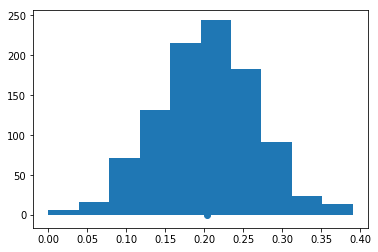

In [13]:
ts = []
for _ in np.arange(1000):
    new = np.diff(iris_sub.sample(with_replacement = True).group(0,np.mean).column(1))[0]
    ts = np.append(ts,new)
plt.hist(ts)
plt.scatter(obs,0)
plt.show()

Step 4: There difference is actually quite standard and it is unusual for them to be the same so we accept the Alternate